In [1]:
## The magic four
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Train Test Split 
from sklearn.model_selection import train_test_split

#Scaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

## StatsModels & SkLearn
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

#needed to import and read .xslx file
import openpyxl

%matplotlib inline


from sklearn.metrics import log_loss


In [2]:
def apr(y_real, y_pred):
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred)
    recall = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1

In [3]:
df = pd.read_csv('oasis_longitudinal.csv')

In [4]:
data = df.copy()

Cleaning

In [5]:
# data.drop(columns = ['SES'], inplace = True)

In [6]:
# data.dropna(inplace = True)

In [7]:
# data["SES"].fillna(data.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [8]:
data.dropna(inplace = True)

In [9]:
data.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [10]:
#Creating 2 dataframes

data1 = data.drop_duplicates(subset = "Subject ID",
                     keep = 'first')
print(data1.shape)
 
data2 = data.drop(data[data['Visit'] == 1].index)
data2.drop_duplicates(subset = "Subject ID",
                     keep = 'first',
                     inplace = True)
print(data2.shape)

(142, 15)
(142, 15)


In [11]:
data1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [12]:
data2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
16,OAS2_0009,OAS2_0009_MR2,Demented,2,576,M,R,69,12,2.0,24.0,0.5,1480,0.791,1.186


In [13]:
data2.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [14]:
data2.columns = ['Subject ID', 'MRI ID', 'Group', 'Visit 2', 'MR Delay 2', 'M/F', 'Hand', 'Age 2', 'EDUC 2', 'SES 2', 'MMSE 2', 'CDR 2',
                'eTIV 2', 'nWBV 2', 'ASF 2']

In [15]:
#merging 2 dataframes
data3 = pd.merge(data1,data2,on='Subject ID')

In [16]:
data3['MMSE minus'] = data3['MMSE 2'] - data3['MMSE']
data3['EDUC minus'] = data3['EDUC 2'] - data3['EDUC']
data3['SES minus'] = data3['SES 2'] - data3['SES']
data3['CDR minus'] = data3['CDR 2'] - data3['CDR']
data3['eTIV minus'] = data3['eTIV 2'] - data3['eTIV']
data3['ASF minus'] = data3['ASF 2'] - data3['ASF']
data3['Age minus'] = data3['Age 2'] - data3['Age']
data3['nWBV minus'] = data3['nWBV 2'] - data3['nWBV']
data3['MR Delay minus'] = data3['MR Delay 2'] - data3['MR Delay']
data3['Visit minus'] = data3['Visit 2'] - data3['Visit']

In [17]:
feature_columns =  [  'Group_x',  'M/F_x',
       'MMSE 2', 'EDUC', 'CDR 2',  'Age 2',
       'eTIV minus', 'ASF minus', 'nWBV minus', 'MR Delay minus'
       ]


data4 = data3[feature_columns]

In [18]:
data5 = data4.copy()

In [19]:
data5.head(149)

,Group_x,M/F_x,MMSE 2,EDUC,CDR 2,Age 2,eTIV minus,ASF minus,nWBV minus,MR Delay minus
0,Nondemented,M,30.0,14,0.0,88,17,-0.007,-0.015,457
1,Nondemented,F,27.0,18,0.0,90,-15,0.018,0.008,538
2,Nondemented,M,29.0,12,0.5,83,12,-0.007,-0.001,1010
3,Nondemented,F,29.0,14,0.0,95,-15,0.016,0.005,742
4,Demented,M,24.0,12,0.5,69,23,-0.019,-0.015,576
...,...,...,...,...,...,...,...,...,...,...
137,Demented,M,26.0,20,0.5,81,8,-0.006,-0.020,652
138,Nondemented,F,30.0,13,0.0,66,11,-0.009,-0.006,182
139,Demented,F,21.0,16,1.0,73,-3,0.003,-0.025,553
140,Demented,M,28.0,16,0.5,82,-11,0.007,-0.017,842


Feature Engineering

In [20]:

data5['Group_x'].replace({"Converted":"Demented"}, inplace= True) #converting Converted to Demented


#One hoc encoding!
data5['Group_x'] = data5['Group_x'].replace(['Nondemented','Demented'], [0,1]) #1 hoc encoding ND and D
data5 = pd.get_dummies(data5, prefix = 'Gender', columns=['M/F_x'], drop_first=True) # 1 hoc encdoing M/F

In [21]:
data5.head()

,Group_x,MMSE 2,EDUC,CDR 2,Age 2,eTIV minus,ASF minus,nWBV minus,MR Delay minus,Gender_M
0,0,30.0,14,0.0,88,17,-0.007,-0.015,457,1
1,0,27.0,18,0.0,90,-15,0.018,0.008,538,0
2,0,29.0,12,0.5,83,12,-0.007,-0.001,1010,1
3,0,29.0,14,0.0,95,-15,0.016,0.005,742,0
4,1,24.0,12,0.5,69,23,-0.019,-0.015,576,1


In [22]:
feature_cols2 =  ['MMSE 2', 
                  'EDUC', 
                  #'SES', 
                  #'CDR 2',
                  'Age 2',
                  'eTIV minus',
                  'nWBV minus', 
                  'Gender_M'
                  #'MR Delay minus',
                  ]

In [23]:
X = data5[feature_cols2]
X = sm.add_constant(X)  #this gets scaled in the wrong way?
y = data5['Group_x']

C:\Users\Lauren Dunn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
X.head()

,const,MMSE 2,EDUC,Age 2,eTIV minus,nWBV minus,Gender_M
0,1.0,30.0,14,88,17,-0.015,1
1,1.0,27.0,18,90,-15,0.008,0
2,1.0,29.0,12,83,12,-0.001,1
3,1.0,29.0,14,95,-15,0.005,0
4,1.0,24.0,12,69,23,-0.015,1


Train Test Splitting

In [25]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0, stratify=y)

In [26]:
X_test.head()

,const,MMSE 2,EDUC,Age 2,eTIV minus,nWBV minus,Gender_M
4,1.0,24.0,12,69,23,-0.015,1
132,1.0,30.0,12,62,-1,-0.011,1
19,1.0,30.0,12,80,13,0.001,0
120,1.0,28.0,18,77,123,-0.037,0
77,1.0,28.0,12,67,-34,0.003,1


Scaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()

In [29]:
# this code serves to separate the constant from the dataframe
# if the consant is scaled it is reduced to 0 and becomes useless
# here we also re-index the scaled dataframe since it loses the index when scaled
if 'const' in list(X_train_eng.columns) and 'const' in list(X_test_eng.columns):

    # Fit and scale the training data
    c = pd.DataFrame(X_train_eng['const'])
    c.reset_index(drop = True, inplace = True)

    X_train_eng.drop(columns = 'const', inplace = True)

    scaled_X_train = scaler.fit_transform(X_train_eng)

    precols = list(X_train_eng.columns)
    scaled_X_train = pd.DataFrame(scaled_X_train, columns= precols)

    scaled_X_train = pd.concat([c,scaled_X_train], axis = 1)

    scaled_X_train.set_index(X_train_eng.reset_index()['index'], inplace = True)

    # Scale the test data 

    k = pd.DataFrame(X_test_eng['const'])
    k.reset_index(drop = True, inplace = True)

    X_test_eng.drop(columns = 'const', inplace = True)

    scaled_X_test = scaler.transform(X_test_eng)

    scaled_X_test = pd.DataFrame(scaled_X_test, columns= precols)

    scaled_X_test = pd.concat([k,scaled_X_test], axis = 1)

    scaled_X_test.set_index(X_test_eng.reset_index()['index'], inplace = True)

else:
    precols = list(X_train_eng.columns)
    
    scaled_X_train = scaler.fit_transform(X_train_eng)
    scaled_X_train = pd.DataFrame(scaled_X_train, columns= precols)
    
    scaled_X_train.set_index(X_train_eng.reset_index()['index'], inplace = True)

    scaled_X_test = scaler.transform(X_test_eng)
    scaled_X_test = pd.DataFrame(scaled_X_test, columns= precols)
    
    scaled_X_test.set_index(X_test_eng.reset_index()['index'], inplace = True)

In [30]:
scaled_X_test.head()

,const,MMSE 2,EDUC,Age 2,eTIV minus,nWBV minus,Gender_M
index,,,,,,,
4,1.0,-0.748254,-0.964862,-1.100491,0.367143,-0.364015,1.394433
132,1.0,0.772160,-0.964862,-2.014896,-0.301441,-0.029941,1.394433
19,1.0,0.772160,-0.964862,0.336432,0.088566,0.972282,-0.717137
120,1.0,0.265355,1.143909,-0.055456,3.152905,-2.201423,-0.717137
77,1.0,0.265355,-0.964862,-1.361750,-1.220742,1.139319,1.394433


In [31]:
normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns) #however we have scaled the constant too :(. Maybe remove constant?

In [32]:
normalized_X_train.head()

,const,MMSE 2,EDUC,Age 2,eTIV minus,nWBV minus,Gender_M
0,0.0,0.772160,1.143909,0.467062,0.088566,0.137096,-0.717137
1,0.0,-1.761863,-0.964862,0.336432,0.199997,-0.029941,1.394433
2,0.0,0.772160,1.143909,-2.014896,-1.081454,0.638208,1.394433
3,0.0,0.011953,-2.370710,0.336432,-0.329298,0.471171,-0.717137
4,0.0,0.518757,-0.964862,-1.231120,-0.329298,1.807467,1.394433


In [33]:
normalized_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns) #however we have scaled the constant too :(. Maybe remove constant?

In [34]:
normalized_X_test.head()

,const,MMSE 2,EDUC,Age 2,eTIV minus,nWBV minus,Gender_M
0,0.0,-1.057663,-0.791563,-1.091972,0.593762,-0.730019,0.797724
1,0.0,0.862129,-0.791563,-2.000146,-0.201603,-0.389816,0.797724
2,0.0,0.862129,-0.791563,0.335160,0.262360,0.630793,-1.253566
3,0.0,0.222198,1.219938,-0.054058,3.907781,-2.601137,-1.253566
4,0.0,0.222198,-0.791563,-1.351450,-1.295229,0.800895,0.797724


Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(normalized_X_train,y_train)

#
y_pred=logreg.predict(normalized_X_test)

In [36]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

Confusion Matrix

In [37]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[14,  4],
       [ 7, 11]], dtype=int64)

In [38]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

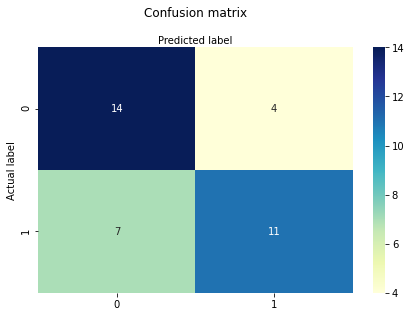

In [39]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6944444444444444
Precision: 0.7333333333333333
Recall: 0.6111111111111112
F1 Score: 0.6666666666666666


In [41]:
# def apr(y_real, y_pred):
#     accuracy = accuracy_score(y_real, y_pred)
#     precision = precision_score(y_real, y_pred)
#     recall = recall_score(y_real, y_pred)
#     f1 = f1_score(y_real, y_pred)
    
#     print(f"Accuracy:{accuracy}")
#     print(f"Precision:{precision}")
#     print(f"Recall:{recall}")
#     print(f"F1:{f1}")
#     return accuracy, precision, recall, f1

Area under curve

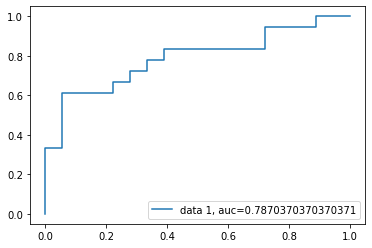

In [42]:
y_pred_proba = logreg.predict_proba(normalized_X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()